In [1]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime
from FlightTracker import FlightTracker
tracker = FlightTracker('2023-05-12 00:00:00')

In [10]:
print(tracker.flights_distinct.reset_index(drop=True))

    index flightnumber        date              filename  \
0       0     THY8JK    2023-05-12  2023.05.13-051443.db   
1       1     THY76Y    2023-05-12  2023.05.13-051443.db   
2       2     THY8MT    2023-05-12  2023.05.13-051443.db   
3       3     THY73G    2023-05-12  2023.05.13-051443.db   
4       4     SAS931    2023-05-12  2023.05.13-051443.db   
5       5     DAL143    2023-05-12  2023.05.13-051443.db   
6       6     OCN72     2023-05-12  2023.05.13-051443.db   
7       7     DLH456    2023-05-12  2023.05.13-051443.db   
8       8     DAL179    2023-05-12  2023.05.13-051443.db   
9       9     DLH490    2023-05-12  2023.05.13-051443.db   
10     10     SKIER52   2023-05-12  2023.05.13-051443.db   
11     11     QTR38U    2023-05-12  2023.05.13-051443.db   
12     12     DAL936A   2023-05-12  2023.05.13-051443.db   
13     13     CFG2034   2023-05-12  2023.05.13-051443.db   
14     14     THY79K    2023-05-12  2023.05.13-051443.db   
15     15     PIA781    2023-05-12  2023

"2023-05-12T12:40:07" "2023-05-12T12:46:14" duration: 0:06:07 [s]
OCN72   


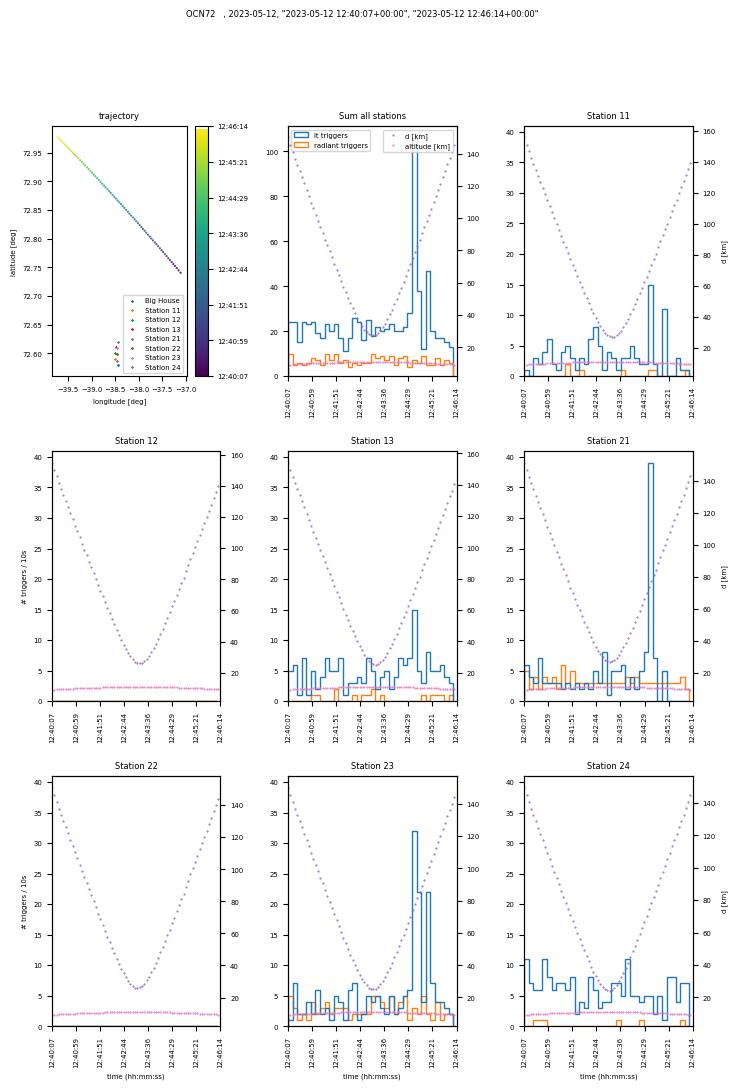

In [14]:
tracker.plot_flight(6)

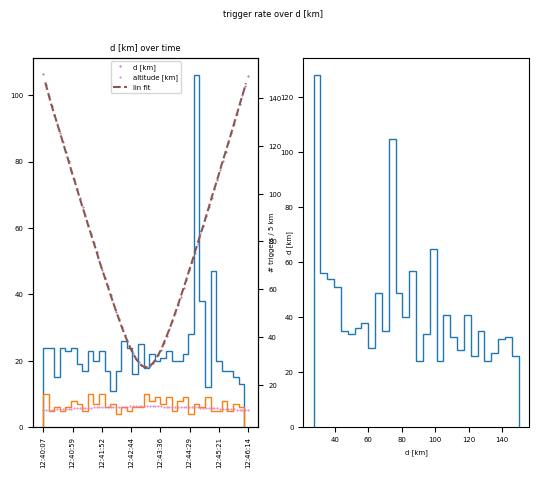

In [12]:
tracker.plot_trigger_rate_over_d()

In [5]:
tracker.set_flight_index(5)

"2023-05-12T11:57:24" "2023-05-12T11:58:25" duration: 0:01:01 [s]
DAL143  


In [6]:

'''
tracker.flights_distinct = tracker.flights_distinct.query('minr2 < 30')
df = pd.DataFrame(['trigger_distances'])
for i in range(len(tracker.flights_distinct)):
    t = tracker.flights_distinct
    start_time = t.mintime.iloc[i][:19] # [:19] to throw away potential microseconds
    stop_time = t.maxtime.iloc[i][:19] # [:19] to throw away potential microseconds
    start_time = FlightTracker.utc.localize(datetime.strptime(start_time, FlightTracker.fmt))
    stop_time = FlightTracker.utc.localize(datetime.strptime(stop_time, FlightTracker.fmt))

    flightnumber = t.flightnumber.iloc[i]
    print(i, ' ', flightnumber)

    f = tracker.flights.query(f"readtime_utc >= '{datetime.strftime(start_time, FlightTracker.fmt)}' & readtime_utc <= '{datetime.strftime(stop_time, FlightTracker.fmt)}' & flightnumber == '{flightnumber}' ").copy()
    times = pd.to_datetime(f.readtime_utc, format='ISO8601').astype('int64') / 10**9
    r = np.sqrt(f.r2)

    header_df = FlightTracker.get_runtable(start_time, stop_time)

    temp_df = pd.DataFrame()
    temp_df['trigger_distances'] = FlightTracker.part_lin(header_df[(times.min() <= header_df.trigger_time) & (header_df.trigger_time <= times.max())].trigger_time, times, r)
    
    df = pd.concat([df, temp_df], ignore_index=True)



plt.hist(df.trigger_distances, bins = 50)
;
'''

'\ntracker.flights_distinct = tracker.flights_distinct.query(\'minr2 < 30\')\ndf = pd.DataFrame([\'trigger_distances\'])\nfor i in range(len(tracker.flights_distinct)):\n    t = tracker.flights_distinct\n    start_time = t.mintime.iloc[i][:19] # [:19] to throw away potential microseconds\n    stop_time = t.maxtime.iloc[i][:19] # [:19] to throw away potential microseconds\n    start_time = FlightTracker.utc.localize(datetime.strptime(start_time, FlightTracker.fmt))\n    stop_time = FlightTracker.utc.localize(datetime.strptime(stop_time, FlightTracker.fmt))\n\n    flightnumber = t.flightnumber.iloc[i]\n    print(i, \' \', flightnumber)\n\n    f = tracker.flights.query(f"readtime_utc >= \'{datetime.strftime(start_time, FlightTracker.fmt)}\' & readtime_utc <= \'{datetime.strftime(stop_time, FlightTracker.fmt)}\' & flightnumber == \'{flightnumber}\' ").copy()\n    times = pd.to_datetime(f.readtime_utc, format=\'ISO8601\').astype(\'int64\') / 10**9\n    r = np.sqrt(f.r2)\n\n    header_df = F